## ___Correlation and Causation___

_Correlation and Causation are 2 terms whcih are often used in Data analytics. People tend to use these words interchangeably without knowing the fundamental logic behind them. Apparently, people get trapped in the phonetics of these words and end up using them at incorrect places. But, let me warn you that apart from the similar sounding names, there isn’t a lot common in the two phenomena. Their fundamental implications are very different._

### ___What is Correlation?___

_Correlation is a term in statistics that refers to the degree of association between two random variables. So the correlation between two data sets is the amount to which they resemble one another._

_If A and B tend to be observed at the same time, you’re pointing out a correlation between A and B. You’re not implying A causes B or vice versa. You’re simply saying when A is observed, B is observed. They move together or show up at the same time._

_There are three types of correlations that we can identify:_

* _**Positive Correlation** is when you observe A increasing and B increases as well. Or if A decreases, B correspondingly decreases. Example: the more purchases made in your app, the more time is spent using your app._
* _**Negative Correlation** is when an increase in A leads to a decrease in B or vice versa._
* _**No correlation** is when two variables are completely unrelated and a change in A leads to no changes in B, or vice versa._

_It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation._

_We may also be interested in the correlation between input variables with the output variable in order provide insight into which variables may or may not be relevant as input for developing a model._

_The structure of the relationship may be known, e.g. it may be linear, or we may have no idea whether a relationship exists between two variables or what structure it may take. Depending what is known about the relationship and the distribution of the variables, different correlation scores can be calculated._

_The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. An example is multiple linear regression, where one of the offending correlated variables should be removed in order to improve the skill of the model. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature. Correlation is an important concept in regression analysis._

___How Can I Deal With This Problem?___

_There are multiple ways to deal with this problem. The easiest way is to delete or eliminate one of the perfectly correlated features. Another way is to use a dimension reduction algorithm such as Principle Component Analysis (PCA). But this will be studies in detail later._

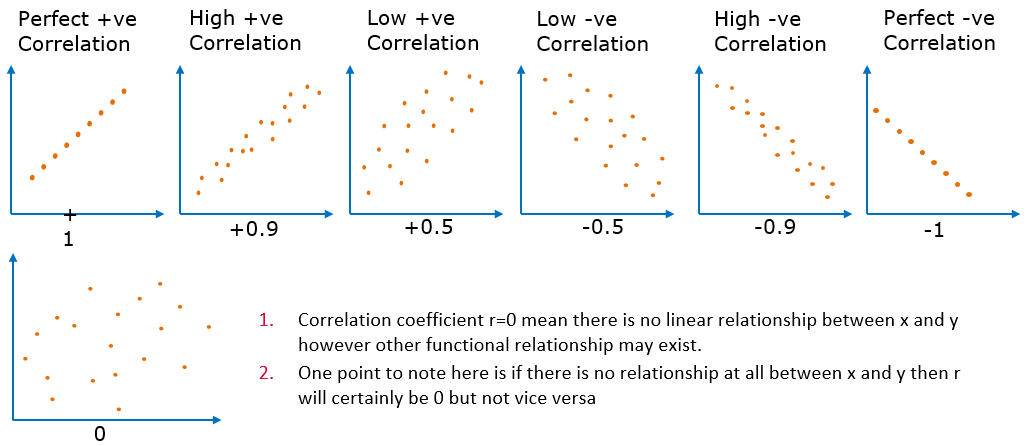

In [0]:
# Importing Libraries
import math

import numpy as np
import numpy.random as random
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


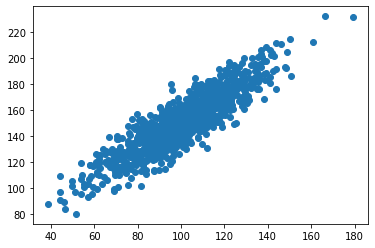

In [9]:
# Genrating Data 
# data 1 - Gaussian Distribution with Mean 100 and Std of 20
# data 2 - Data1 +Gaussian Distribution with Mean 50 and Std of 10

# randn() function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, 
# then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.

# seed random number generator
random.seed(1)

# prepare data
data1 = 20 * random.randn(1000) + 100
data2 = data1 + (10 * random.randn(1000) + 50)

# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))

# plot
plt.scatter(data1, data2)
plt.show()

_Before we look at calculating some correlation scores, we must first look at an important statistical building block, called **COVARIANCE**._

#### ___What is Covariance?___

_Covariance is a measure used to determine how much two variables change in tandem (at last). The unit of covariance is a product of the units of the two variables._

_Covariance is affected by a change in scale i.e. if all the value of one variable is multiplied by a constant and all the value of another variable are multiplied, by a similar or different constant, then the covariance is changed._

_The value of covariance lies between -∞ and +∞._

```
cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
```
_The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). The magnitude of the covariance is not easily interpreted. A covariance value of zero indicates that both variables are completely independent._

_The covariance and covariance matrix are used widely within statistics and multivariate analysis to characterize the relationships between two or more variables._


In [11]:
np.cov(data1,data2) # we can see the covariance is 389 which is positive covariance between both the data points

array([[385.33297729, 389.7545618 ],
       [389.7545618 , 500.38006058]])

#### ___Pearson's Correclation Coefficient___

_Pearson Correlation Coefficient can be used with continuous variables that have a linear relationship._

```
Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
```

_The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation._

_The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation._

_The Pearson’s correlation coefficient can be used to evaluate the relationship between more than two variables._

_This can be done by calculating a matrix of the relationships between each pair of variables in the dataset. The result is a symmetric matrix called a correlation matrix with a value of 1.0 along the diagonal as each column always perfectly correlates with itself._

In [0]:
from scipy import stats

In [13]:
stats.pearsonr(data1, data2)
# where the first value is the Pearson Correlation Coefficients and the second value is the P-value. 
# 0.8 means that the variables are highly positively correlated.

(0.8876119085795309, 0.0)

#### ___Spearman's Correclation Coefficient___

_If the variables have a non-linear relationship, you can measure the correlation using Spearman Correlation Coefficient. It can also be used with ordinal categorical variables._

_Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated from the relative rank (ordering a number from highest to lower) of values on each sample. This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian._

```
Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
```

_A linear relationship between the variables is not assumed, although a monotonic relationship is assumed. This is a mathematical name for an increasing or decreasing relationship between the two variables._

_If you are unsure of the distribution and possible relationships between two variables, Spearman correlation coefficient is a good tool to use._

In [14]:
stats.spearmanr(data1, data2) # strong correlation of 0.87

SpearmanrResult(correlation=0.8724050484050484, pvalue=1.58425746359e-312)

#### ___Correlation & Covariance Matrix and Heatmap___

In [15]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


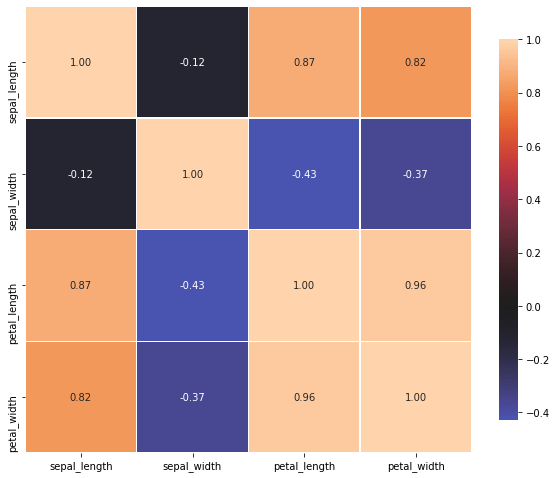

In [16]:
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(iris)

In [26]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


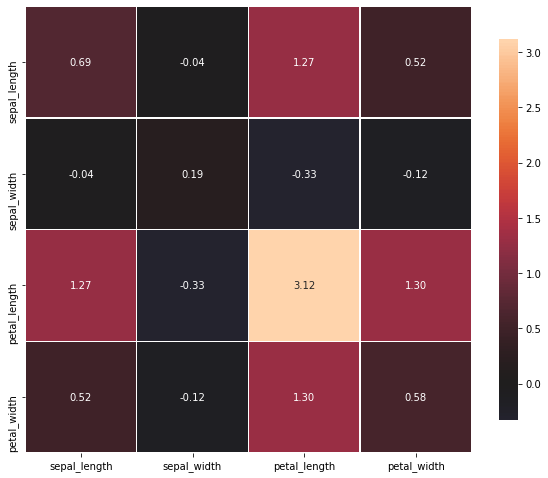

In [29]:
def covariance_heatmap(df):
    covariances = df.cov()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(covariances, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
covariance_heatmap(iris)

In [25]:
iris.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


### ____What is Causation?____
_Causation is implying that A and B have a cause-and-effect relationship with one another. You’re saying A causes B._

_Causation is also known as causality._

* _Firstly, causation means that two events appear at the same time or one after the other._
* _And secondly, it means these two variables not only appear together, the existence of one causes the other to manifest._

_This can be studied by using Random Experiments on the data to study change in set of variables or by A/B Testing in case of marketing campaigns._

_Also, there are various causal modelling techniques available based in the Baysein probability concepts which can be used._